# Stable Diffusion

In the previous chapter, we implemented a small Diffusion Model that could process 28x28 pixel images. However, modern Diffusion Models employ much larger neural networks, leading to significantly improved image generation capabilities.

One of the most prominent examples is [Stable Diffusion (Rombach et al. 2022)](https://arxiv.org/abs/2112.10752). Stable Diffusion has made a significant impact in the field of image generation AI, particularly due to its ability to generate high-quality images from text prompts.

Images from Stable Diffusion [GitHub](https://github.com/Stability-AI/stablediffusion)

![Examples](../figures/chapter6/stable-diffusion-examples.png)

In this chapter, we will introduce the main components of Stable Diffusion and provide a simplified explanation of how it works. 
We will avoid complex mathematical formulas, focusing on providing an intuitive understanding of the model.

![Stable Diffusion](../figures/chapter6/stable-diffusion-model.png)

## Overview of How Stable Diffusion Works


### Pixel Space and Latent Space
In the Diffusion Model we discussed in the previous chapter, both the input image and the noised images were processed with the same number of pixels. This means that the data at all timesteps were processed in the same vector space, often referred to as Pixel Space.

Stable Diffusion, on the other hand, performs the diffusion and denoising processes in a latent space, separate from the pixel space. Essentially, an Image Encoder embeds the image into this latent space, and an Image Decoder reconstructs the image from the latent space. Neural networks like VAEs (Variational Autoencoders) are often used as Image Encoders and Decoders.

### Processing Textual Conditions with CLIP
To generate images from text, we need to convert the text into a vector. Stable Diffusion achieves this by using a pre-trained neural network called CLIP, which transforms textual information into an embedding vector.

CLIP is a model pre-trained on approximately 400 million image-text pairs from the internet. It consists mainly of a "text encoder" and an "image encoder." Each encoder converts text and images into vectors and calculates their similarity. CLIP is trained so that the vectors of paired images and text in the dataset have high similarity.

Through this training process, images and text can be represented in a common vector space, allowing the model to handle their correspondence effectively. This is crucial for Stable Diffusion's ability to generate images that align with the given text prompts.

### Why Latent Space?

You might wonder why Stable Diffusion operates in a latent space rather than directly in pixel space. There are a few key reasons:

* Efficiency: Processing images in a compressed latent space is computationally less expensive than dealing with high-dimensional pixel data.
* Meaningful Representations: Latent spaces can capture more abstract and semantically meaningful representations of images, which can be beneficial for generating diverse and creative outputs.
* Stability: Operating in a latent space can help stabilize the diffusion process, leading to more consistent and reliable results.

![CLIP](../figures/chapter6/CLIP.png)

### Attention Mechanism

While CLIP has successfully transformed our text into a vector, we want to use this vector as a condition in our diffusion model. This requires integrating the text information into the UNet architecture of the diffusion model.

Stable Diffusion achieves this by introducing Attention layers, as illustrated in the following diagram.

Attention, a module commonly used in Transformer models, calculates the similarity between two inputs and uses this similarity as weights to focus on important parts of the input. For a detailed explanation, please refer to the original [Transformer paper (Vaswani et al. 2017)](https://arxiv.org/abs/1706.03762).

In Stable Diffusion, Attention layers are strategically placed within the UNet architecture. These layers enable the model to attend to both the textual information (from CLIP) and the image information (from the latent space) during the denoising process.

By incorporating Attention, Stable Diffusion can effectively leverage the textual condition to guide the generation of images that align with the given text prompt. This is a key factor in the model's ability to produce high-quality images that accurately reflect the desired content and style.

![Attention](../figures/chapter6/Attention.png)

### Diffuser Library

Stable Diffusion is a complex model, but thankfully, we don't have to build it from scratch! 

[Stability-AI/stablediffusion GitHub Repository](https://github.com/Stability-AI/stablediffusion)

The Hugging Face diffusers library provides a user-friendly interface for working with Stable Diffusion and other diffusion models. 
You can find the code on their GitHub repository: https://github.com/huggingface/diffusers.

The diffusers library streamlines the process of loading pre-trained models, generating images, and even fine-tuning models for specific tasks. It also provides tools for exploring the latent space, visualizing the diffusion process, and experimenting with different parameters.

In [1]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

pipeline.to(device)

  0%|          | 0/50 [00:00<?, ?it/s]

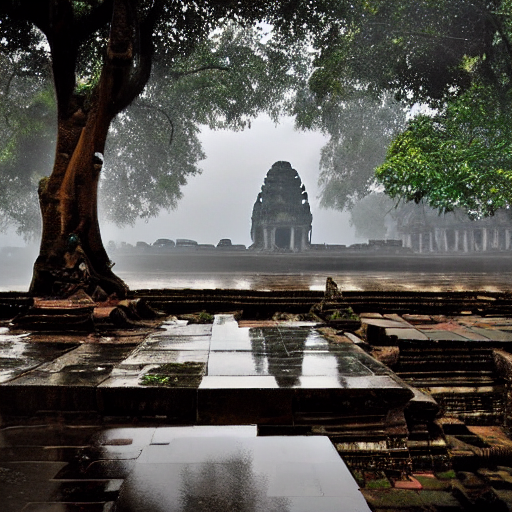

In [6]:
prompt = "A photorealistic image of Angkor in rain."
pipeline(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

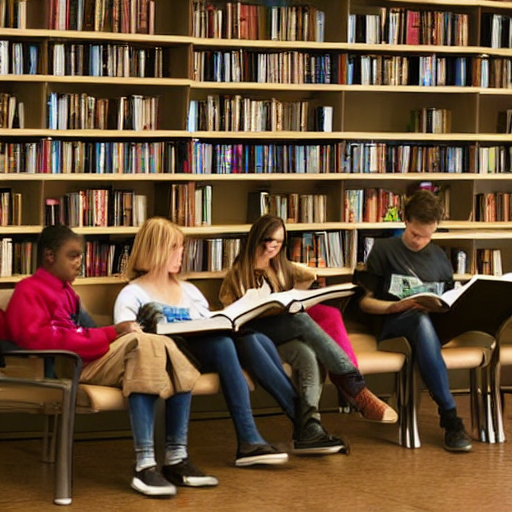

In [8]:
prompt = "A photorealistic image of students reading in a library."
pipeline(prompt).images[0]